# Load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,id,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,...,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
0,77130752.0,13011,18.0,4177.0,0,3664,11,2016,10,14,...,420.0,76.0,85.0,91.0,104.0,120.0,366.0,73.0,1050.0,1050.0
1,77126682.0,13011,28.0,6054.0,1,3244,10,2015,8,21,...,158.0,98.0,104.5,109.0,119.0,139.0,360.0,73.0,1050.0,1050.0
2,9816130.0,13011,8.0,1753.0,0,3086,9,2015,3,16,...,1050.0,102.0,111.0,117.0,126.0,140.5,386.0,73.0,1050.0,1050.0
3,1641895.0,13011,12.0,3194.0,0,2036,8,2012,4,30,...,73.0,137.0,146.0,145.0,161.0,157.0,291.0,73.0,682.0,682.0
4,1523930.0,13011,4.0,922.0,0,1963,7,2012,2,17,...,338.0,137.0,149.0,147.0,161.0,159.0,327.0,136.0,682.0,682.0


# How many releases each artist has

In [3]:
df.groupby('artist_id').count()['id'].head()

artist_id
2     1
4    19
5     6
6     6
7    13
Name: id, dtype: int64

In [4]:
artist_counts = df.groupby('artist_id').count()
artist_counts['id'].head()

artist_id
2     1
4    19
5     6
6     6
7    13
Name: id, dtype: int64

(array([542., 330., 130., 242., 114., 214., 167.,  61., 115.,  50.,  73.,
         71.,  26.,  48.,  20.,  48.,  33.,  16.,  27.,   8.,  18.,  17.,
          3.,   9.,   9.,  12.,  10.,   4.,   9.,   4.,  10.,   9.,   2.,
         12.,   1.,   4.,   4.,   1.,   4.,   2.,   4.,   1.,   1.,   3.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. , 34.6,
        36.2, 37.8, 39.4, 41. , 42.6, 44.2, 45.8, 47.4, 49. , 50.6, 52.2,
        53.8, 55.4, 57. , 58.6, 60.2, 61.8, 63.4, 65. , 66.6, 68.2, 69.8,
        71.4, 73. , 74.6, 76.2, 77.8, 79.4, 81. ]),
 <a list of 50 Patch objects>)

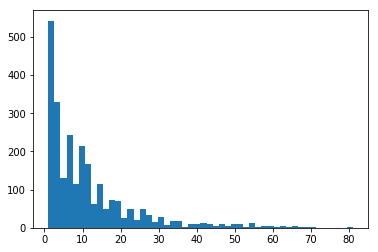

In [5]:
plt.hist(artist_counts['id'].values, bins=50)

In [6]:
artist_counts[artist_counts['id'] > 400].index

Int64Index([], dtype='int64', name=u'artist_id')

In [7]:
# df[df['artist_id'] == 516]
# df[df['artist_id'] == 516][df['title'].str.contains('Hits')]

# Date features

In [8]:
# plt.hist(df['album_year'].values, bins=30)

In [9]:
# df[df['album_year'] < 1950]

All these artists were born after 1900 year so seems like those album dates are wrong.  
Let's drop them

In [10]:
# df.drop(df[df['album_year'] < 1950].index, inplace=True)

In [11]:
# df[df['album_year'] < 1950]

In [12]:
# plt.hist(df['album_year'].values, bins=30)

# Days until next album

(array([1.6084e+04, 4.0890e+03, 2.1340e+03, 1.3220e+03, 1.0570e+03,
        6.2500e+02, 4.8900e+02, 4.2300e+02, 3.1100e+02, 2.4200e+02,
        1.8500e+02, 1.5000e+02, 1.2500e+02, 1.0200e+02, 8.2000e+01,
        7.5000e+01, 5.0000e+01, 5.8000e+01, 2.7000e+01, 2.9000e+01,
        2.3000e+01, 1.4000e+01, 2.0000e+01, 1.2000e+01, 5.0000e+00,
        1.1000e+01, 5.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 8.9400e+01, 1.7780e+02, 2.6620e+02, 3.5460e+02,
        4.4300e+02, 5.3140e+02, 6.1980e+02, 7.0820e+02, 7.9660e+02,
        8.8500e+02, 9.7340e+02, 1.0618e+03, 1.1502e+03, 1.2386e+03,
        1.3270e+03, 1.4154e+03, 1.5038e+03, 1.5922e+03, 1.6806e+03,
        1.7690e+03, 1.8574e+03, 1.9458e+03, 2.0342e+03, 2.1226e+03,
        2.2110e+03, 2.2994e+03, 2.3878e+03, 2.4762e+03, 2.5646e+03,
        2.6530e+03]),
 <a list of 30 Patch objects>)

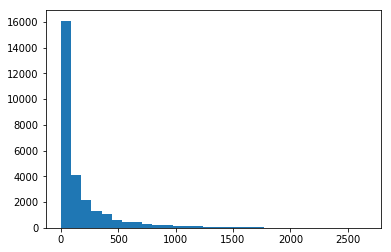

In [13]:
plt.hist(df['days_until_next_album'].values, bins=30)

In [14]:
df[(df['record_type_album'] == 1) & (df['days_until_next_album'] <= 365)].shape

(10770, 31)

In [15]:
df[(df['record_type_album'] == 1) & (df['days_until_next_album'] > 365)].shape

(2799, 31)

(array([2006., 1170.,  847.,  706.,  541.,  538.,  437.,  402.,  331.,
         346.,  295.,  218.,  255.,  268.,  228.,  199.,  254.,  174.,
         163.,  140.,  157.,  124.,  154.,  113.,  124.,  123.,  105.,
         109.,  112.,  131.]),
 array([  1.        ,  13.13333333,  25.26666667,  37.4       ,
         49.53333333,  61.66666667,  73.8       ,  85.93333333,
         98.06666667, 110.2       , 122.33333333, 134.46666667,
        146.6       , 158.73333333, 170.86666667, 183.        ,
        195.13333333, 207.26666667, 219.4       , 231.53333333,
        243.66666667, 255.8       , 267.93333333, 280.06666667,
        292.2       , 304.33333333, 316.46666667, 328.6       ,
        340.73333333, 352.86666667, 365.        ]),
 <a list of 30 Patch objects>)

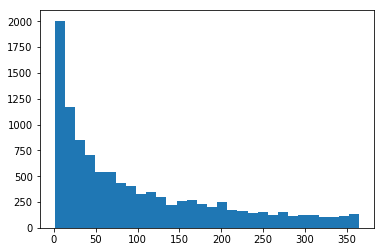

In [49]:
plt.hist(df[(df['record_type_album'] == 1) & (df['days_until_next_album'] <= 365)]['days_until_next_album'].values, bins=30)

In [53]:
df[(df['record_type_album'] == 1)]['days_until_next_album'].median()

104.0

(array([606., 344., 316., 282., 223., 196., 117., 125.,  91.,  82.,  68.,
         64.,  68.,  26.,  35.,  41.,  20.,  18.,  14.,  12.,   7.,  13.,
         10.,   3.,   6.,   4.,   4.,   0.,   2.,   2.]),
 array([ 366.        ,  442.23333333,  518.46666667,  594.7       ,
         670.93333333,  747.16666667,  823.4       ,  899.63333333,
         975.86666667, 1052.1       , 1128.33333333, 1204.56666667,
        1280.8       , 1357.03333333, 1433.26666667, 1509.5       ,
        1585.73333333, 1661.96666667, 1738.2       , 1814.43333333,
        1890.66666667, 1966.9       , 2043.13333333, 2119.36666667,
        2195.6       , 2271.83333333, 2348.06666667, 2424.3       ,
        2500.53333333, 2576.76666667, 2653.        ]),
 <a list of 30 Patch objects>)

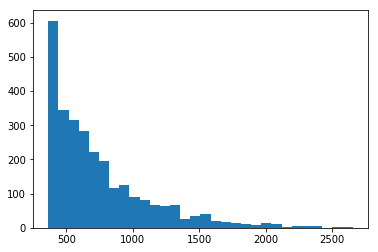

In [17]:
plt.hist(df[(df['record_type_album'] == 1) & (df['days_until_next_album'] > 365)]['days_until_next_album'].values, bins=30)

In [18]:
df[(df['record_type_single'] == 1) & (df['days_until_next_album'] <= 365)].shape

(12446, 31)

In [19]:
df[(df['record_type_single'] == 1) & (df['days_until_next_album'] > 365)].shape

(1003, 31)

(array([2913., 2134., 1520., 1040.,  612.,  637.,  473.,  431.,  268.,
         278.,  275.,  186.,  214.,  140.,  164.,  122.,  100.,  102.,
         105.,   83.,  110.,   77.,   75.,   59.,   58.,   53.,   48.,
          52.,   53.,   64.]),
 array([  1.        ,  13.13333333,  25.26666667,  37.4       ,
         49.53333333,  61.66666667,  73.8       ,  85.93333333,
         98.06666667, 110.2       , 122.33333333, 134.46666667,
        146.6       , 158.73333333, 170.86666667, 183.        ,
        195.13333333, 207.26666667, 219.4       , 231.53333333,
        243.66666667, 255.8       , 267.93333333, 280.06666667,
        292.2       , 304.33333333, 316.46666667, 328.6       ,
        340.73333333, 352.86666667, 365.        ]),
 <a list of 30 Patch objects>)

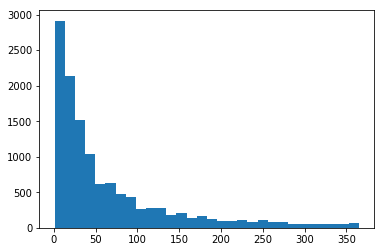

In [50]:
plt.hist(df[(df['record_type_single'] == 1) & (df['days_until_next_album'] <= 365)]['days_until_next_album'].values, bins=30)

In [54]:
df[(df['record_type_single'] == 1)]['days_until_next_album'].median()

40.0

(array([202., 153., 109.,  98.,  82.,  64.,  42.,  43.,  30.,  24.,  22.,
         19.,  22.,  11.,  13.,  12.,   9.,   5.,   8.,   7.,   2.,   6.,
          3.,   7.,   1.,   2.,   2.,   1.,   1.,   3.]),
 array([ 366.        ,  429.63333333,  493.26666667,  556.9       ,
         620.53333333,  684.16666667,  747.8       ,  811.43333333,
         875.06666667,  938.7       , 1002.33333333, 1065.96666667,
        1129.6       , 1193.23333333, 1256.86666667, 1320.5       ,
        1384.13333333, 1447.76666667, 1511.4       , 1575.03333333,
        1638.66666667, 1702.3       , 1765.93333333, 1829.56666667,
        1893.2       , 1956.83333333, 2020.46666667, 2084.1       ,
        2147.73333333, 2211.36666667, 2275.        ]),
 <a list of 30 Patch objects>)

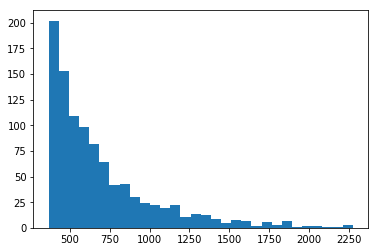

In [21]:
plt.hist(df[(df['record_type_single'] == 1) & (df['days_until_next_album'] > 365)]['days_until_next_album'].values, bins=30)

In [22]:
df[(df['record_type_ep'] == 1) & (df['days_until_next_album'] <= 365)].shape

(588, 31)

In [23]:
df[(df['record_type_ep'] == 1) & (df['days_until_next_album'] > 365)].shape

(149, 31)

(array([95., 58., 38., 39., 29., 40., 24., 28., 20., 17., 19., 11., 18.,
        21., 11., 11.,  5.,  6., 12.,  8., 16.,  7.,  8.,  6., 10.,  9.,
         6.,  5.,  1., 10.]),
 array([  1.        ,  13.13333333,  25.26666667,  37.4       ,
         49.53333333,  61.66666667,  73.8       ,  85.93333333,
         98.06666667, 110.2       , 122.33333333, 134.46666667,
        146.6       , 158.73333333, 170.86666667, 183.        ,
        195.13333333, 207.26666667, 219.4       , 231.53333333,
        243.66666667, 255.8       , 267.93333333, 280.06666667,
        292.2       , 304.33333333, 316.46666667, 328.6       ,
        340.73333333, 352.86666667, 365.        ]),
 <a list of 30 Patch objects>)

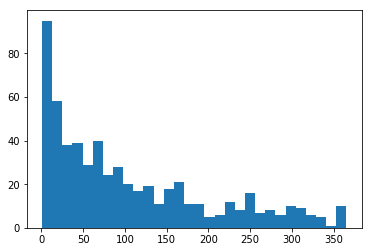

In [24]:
plt.hist(df[(df['record_type_ep'] == 1) & (df['days_until_next_album'] <= 365)]['days_until_next_album'].values, bins=30)

(array([29., 24., 15., 10., 11.,  9.,  7.,  6.,  2.,  5.,  6.,  5.,  2.,
         2.,  3.,  2.,  2.,  1.,  2.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,
         2.,  0.,  0.,  1.]),
 array([ 371. ,  433.3,  495.6,  557.9,  620.2,  682.5,  744.8,  807.1,
         869.4,  931.7,  994. , 1056.3, 1118.6, 1180.9, 1243.2, 1305.5,
        1367.8, 1430.1, 1492.4, 1554.7, 1617. , 1679.3, 1741.6, 1803.9,
        1866.2, 1928.5, 1990.8, 2053.1, 2115.4, 2177.7, 2240. ]),
 <a list of 30 Patch objects>)

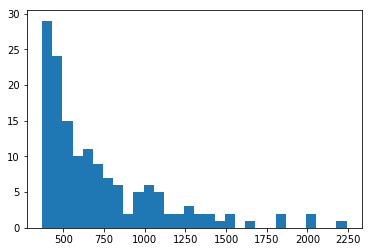

In [25]:
plt.hist(df[(df['record_type_ep'] == 1) & (df['days_until_next_album'] > 365)]['days_until_next_album'].values, bins=30)

(array([370., 149., 159., 164., 151., 119., 418.,  86.,  79.,  97., 101.,
         52.,  61., 335.,  57.,  67.,  63.,  83.,  63.,  80., 244.,  40.,
         41.,  46.,  51.,  46.,  63., 206.,  61.,  50.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <a list of 30 Patch objects>)

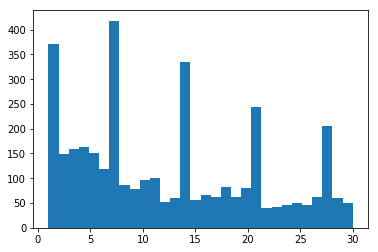

In [26]:
plt.hist(df[(df['record_type_album'] == 1) & (df['days_until_next_album'] <= 30)]['days_until_next_album'].values, bins=30)

# Most correlative features

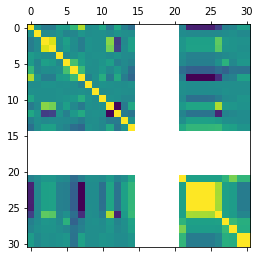

In [27]:
plt.matshow(df.corr())
plt.show()

In [28]:
corr = df.corr()
corr[(corr['days_until_next_album'] > 0.2) | (corr['days_until_next_album'] < -0.2)]['days_until_next_album']

id                                                      -0.254581
total_albums_released                                   -0.259793
release_year                                            -0.324509
record_type_album                                        0.204751
record_type_single                                      -0.215425
days_until_next_album                                    1.000000
days_since_previous_release                              0.208429
average_days_to_release_in_last_year                     0.321937
average_days_to_release_in_last_2_years                  0.323995
average_days_to_release_in_last_3_years                  0.324007
average_days_to_release_in_last_5_years                  0.325342
average_days_to_release_in_last_year_for_release_type    0.343353
Name: days_until_next_album, dtype: float64

In [29]:
corr = df[df['release_year'] >= 2018].corr()
corr[(corr['days_until_next_album'] > 0.2) | (corr['days_until_next_album'] < -0.2)]['days_until_next_album']

id                                                      -0.302532
release_year                                            -0.278434
days_until_next_album                                    1.000000
average_days_to_release_in_last_year                     0.317941
average_days_to_release_in_last_2_years                  0.318031
average_days_to_release_in_last_3_years                  0.317150
average_days_to_release_in_last_5_years                  0.317616
average_days_to_release_in_last_year_for_release_type    0.312670
Name: days_until_next_album, dtype: float64

In [30]:
most_correlative_columns = corr[(corr['days_until_next_album'] > 0.2) | (corr['days_until_next_album'] < -0.2)].index
most_correlative_columns

Index([u'id', u'release_year', u'days_until_next_album',
       u'average_days_to_release_in_last_year',
       u'average_days_to_release_in_last_2_years',
       u'average_days_to_release_in_last_3_years',
       u'average_days_to_release_in_last_5_years',
       u'average_days_to_release_in_last_year_for_release_type'],
      dtype='object')

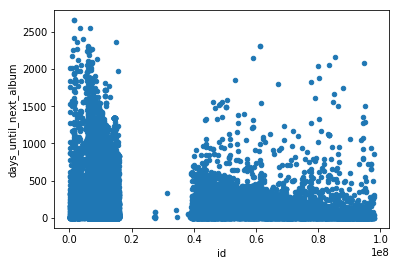

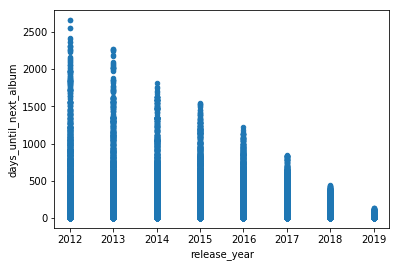

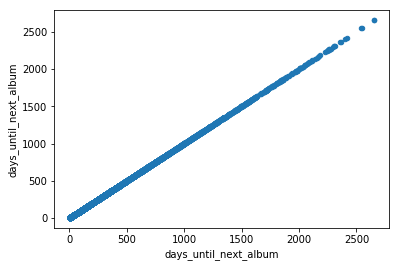

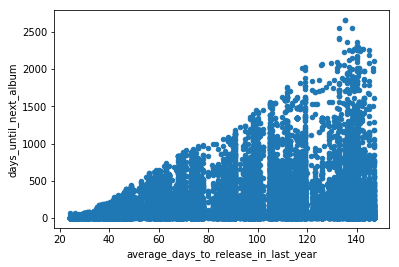

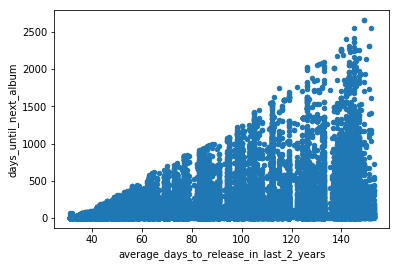

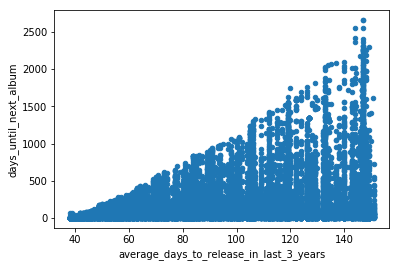

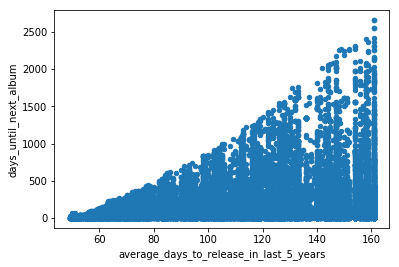

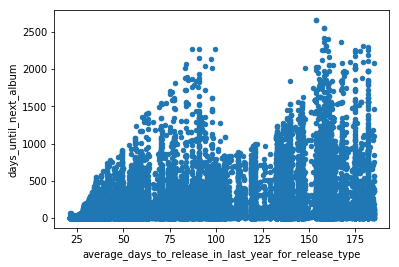

In [31]:
for column in most_correlative_columns:
    df.plot(x=column, y='days_until_next_album', kind='scatter')

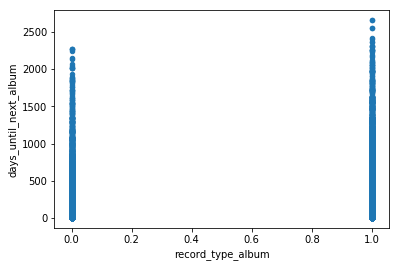

In [45]:
df.plot(x='record_type_album', y='days_until_next_album', kind='scatter')